In [16]:
from riotwatcher import LolWatcher, ApiError

key = open('C:/Users/ThinkPad/Desktop/league test code/api_key.txt','r') #reading riot Dev API key 

lol_watcher = LolWatcher('key.read()') 

region = 'na1'
versions = lol_watcher.data_dragon.versions_for_region(region)
item_version = versions['n']['item'] #checking the current patch

current_champ_list = lol_watcher.data_dragon.champions(item_version) #requesting all the champ details from the current patch

print(item_version)



12.13.1


In [17]:
#current_champ_list #Large json file so I commented it our 

In [18]:
import pandas as pd
pd.set_option('display.max_columns',None)
#pd.json_normalize(current_champ_list['data'])
pd.DataFrame(current_champ_list['data']) #making a dataframe from the json I recived from the API

,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,AurelionSol,Azir,Bard,Belveth,Blitzcrank,Brand,Braum,Caitlyn,Camille,Cassiopeia,Chogath,Corki,Darius,Diana,Draven,DrMundo,Ekko,Elise,Evelynn,Ezreal,Fiddlesticks,Fiora,Fizz,Galio,Gangplank,Garen,Gnar,Gragas,Graves,Gwen,Hecarim,Heimerdinger,Illaoi,Irelia,Ivern,Janna,JarvanIV,Jax,Jayce,Jhin,Jinx,Kaisa,Kalista,Karma,Karthus,Kassadin,Katarina,Kayle,Kayn,Kennen,Khazix,Kindred,Kled,KogMaw,Leblanc,LeeSin,Leona,Lillia,Lissandra,Lucian,Lulu,Lux,Malphite,Malzahar,Maokai,MasterYi,MissFortune,MonkeyKing,Mordekaiser,Morgana,Nami,Nasus,Nautilus,Neeko,Nidalee,Nilah,Nocturne,Nunu,Olaf,Orianna,Ornn,Pantheon,Poppy,Pyke,Qiyana,Quinn,Rakan,Rammus,RekSai,Rell,Renata,Renekton,Rengar,Riven,Rumble,Ryze,Samira,Sejuani,Senna,Seraphine,Sett,Shaco,Shen,Shyvana,Singed,Sion,Sivir,Skarner,Sona,Soraka,Swain,Sylas,Syndra,TahmKench,Taliyah,Talon,Taric,Teemo,Thresh,Tristana,Trundle,Tryndamere,TwistedFate,Twitch,Udyr,Urgot,Varus,Vayne,Veigar,Velkoz,Vex,Vi,Viego,Viktor,Vladimir,Volibear,Warwick,Xayah,Xerath,XinZhao,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Zeri,Ziggs,Zilean,Zoe,Zyra
version,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1,12.13.1
id,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,AurelionSol,Azir,Bard,Belveth,Blitzcrank,Brand,Braum,Caitlyn,Camille,Cassiopeia,Chogath,Corki,Darius,Diana,Draven,DrMundo,Ekko,Elise,Evelynn,Ezreal,Fiddlesticks,Fiora,Fizz,Galio,Gangplank,Garen,Gnar,Gragas,Graves,Gwen,Hecarim,Heimerdinger,Illaoi,Irelia,Ivern,Janna,JarvanIV,Jax,Jayce,Jhin,Jinx,Kaisa,Kalista,Karma,Karthus,Kassadin,Katarina,Kayle,Kayn,Kennen,Khazix,Kindred,Kled,KogMaw,Leblanc,LeeSin,Leona,Lillia,Lissandra,Lucian,Lulu,Lux,Malphite,Malzahar,Maokai,MasterYi,MissFortune,MonkeyKing,Mordekaiser,Morgana,Nami,Nasus,Nautilus,Neeko,Nidalee,Nilah,Nocturne,Nunu,Olaf,Orianna,Ornn,Pantheon,Poppy,Pyke,Qiyana,Quinn,Rakan,Rammus,RekSai,Rell,Renata,Renekton,Rengar,Riven,Rumble,Ryze,Samira,Sejuani,Senna,Seraphine,Sett,Shaco,Shen,Shyvana,Singed,Sion,Sivir,Skarner,Sona,Soraka,Swain,Sylas,Syndra,TahmKench,Taliyah,Talon,Taric,Teemo,Thresh,Tristana,Trundle,Tryndamere,TwistedFate,Twitch,Udyr,Urgot,Varus,Vayne,Veigar,Velkoz,Vex,Vi,Viego,Viktor,Vladimir,Volibear,Warwick,Xayah,Xerath,XinZhao,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Zeri,Ziggs,Zilean,Zoe,Zyra
key,266,103,84,166,12,32,34,1,523,22,136,268,432,200,53,63,201,51,164,69,31,42,122,131,119,36,245,60,28,81,9,114,105,3,41,86,150,79,104,887,120,74,420,39,427,40,59,24,126,202,222,145,429,43,30,38,55,10,141,85,121,203,240,96,7,64,89,876,127,236,117,99,54,90,57,11,21,62,82,25,267,75,111,518,76,895,56,20,2,61,516,80,78,555,246,133,497,33,421,526,888,58,107,92,68,13,360,113,235,147,875,35,98,102,27,14,15,72,37,16,50,517,134,223,163,91,44,17,412,18,48,23,4,29,77,6,

In [19]:
df = pd.DataFrame(current_champ_list['data'])
df.T
df2 = df.T #I wanted to use the rows as columns 

In [20]:
#Exporting them as csv
df.to_csv('LOLChampData_v1.csv', encoding='utf-8')
df2.to_csv('LOLChampData_v2.csv', encoding='utf-8')

In [21]:
pd.DataFrame(df2['stats']) #just wanna see the stats for all champs 

,stats
Aatrox,"{'hp': 650, 'hpperlevel': 104, 'mp': 0, 'mpper..."
Ahri,"{'hp': 570, 'hpperlevel': 96, 'mp': 418, 'mppe..."
Akali,"{'hp': 570, 'hpperlevel': 119, 'mp': 200, 'mpp..."
Akshan,"{'hp': 630, 'hpperlevel': 104, 'mp': 350, 'mpp..."
Alistar,"{'hp': 670, 'hpperlevel': 120, 'mp': 350, 'mpp..."
...,...
Zeri,"{'hp': 600, 'hpperlevel': 109, 'mp': 250, 'mpp..."
Ziggs,"{'hp': 606, 'hpperlevel': 106, 'mp': 480, 'mpp..."
Zilean,"{'hp': 574, 'hpperlevel': 96, 'mp': 452, 'mppe..."
Zoe,"{'hp': 630, 'hpperlevel': 106, 'mp': 425, 'mpp..."


In [22]:
pd.DataFrame(df2['tags']) #I wanna see the roles assigned to each champ

,tags
Aatrox,"[Fighter, Tank]"
Ahri,"[Mage, Assassin]"
Akali,[Assassin]
Akshan,"[Marksman, Assassin]"
Alistar,"[Tank, Support]"
...,...
Zeri,[Marksman]
Ziggs,[Mage]
Zilean,"[Support, Mage]"
Zoe,"[Mage, Support]"


In [23]:
roles = pd.DataFrame(df2['tags'])
roles.to_csv('LOLChampRoles.csv', encoding='utf-8') #Exporting roles as a csv 

In [24]:
champData= pd.read_csv("LOLChampRoles.csv",error_bad_lines=False)
champData['tags']

0           ['Fighter', 'Tank']
1          ['Mage', 'Assassin']
2                  ['Assassin']
3      ['Marksman', 'Assassin']
4           ['Tank', 'Support']
                 ...           
156                ['Marksman']
157                    ['Mage']
158         ['Support', 'Mage']
159         ['Mage', 'Support']
160         ['Mage', 'Support']
Name: tags, Length: 161, dtype: object

In [25]:
champData["tags"].value_counts()

['Fighter', 'Tank']         22
['Marksman']                15
['Mage']                    15
['Fighter', 'Assassin']     13
['Mage', 'Support']         12
['Tank', 'Fighter']         11
['Support', 'Mage']         10
['Assassin', 'Fighter']      8
['Marksman', 'Assassin']     6
['Assassin']                 5
['Assassin', 'Mage']         5
['Tank', 'Mage']             4
['Fighter', 'Mage']          4
['Tank', 'Support']          4
['Fighter']                  4
['Marksman', 'Mage']         4
['Mage', 'Fighter']          3
['Mage', 'Assassin']         3
['Support', 'Fighter']       2
['Marksman', 'Support']      2
['Mage', 'Marksman']         2
['Support', 'Tank']          2
['Support', 'Assassin']      1
['Fighter', 'Marksman']      1
['Tank']                     1
['Fighter', 'Support']       1
['Support']                  1
Name: tags, dtype: int64

In [26]:
champData["tags"] = champData["tags"].apply(eval)

In [27]:
#Counting the number of champs in a role 
champ = {}
for i in champData["tags"]:
    for j in i:
        if j not in champ:
            champ[j] = 1
        else:
            champ[j] += 1

In [28]:
champ

{'Fighter': 69,
 'Tank': 44,
 'Mage': 62,
 'Assassin': 41,
 'Marksman': 30,
 'Support': 35}

<BarContainer object of 6 artists>

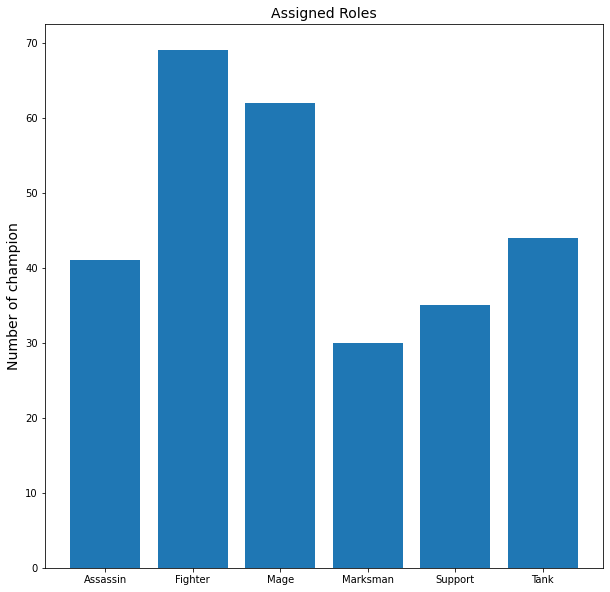

In [30]:
import matplotlib.pyplot as plt 
champList = champ.items()
champList = sorted(champList) 
x, y = zip(*champList) 
fig, ax = plt.subplots(figsize = (10,10))
ax.set_ylabel("Number of champion", size = 14)
ax.set_title("Assigned Roles", size = 14)
ax.bar(x, y)